# Data Loading

In [50]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt;

In [3]:
data = pd.read_csv('/kaggle/input/airbus-ship-detection/train_ship_segmentations_v2.csv')

In [4]:
rle_dict: dict = {}
for _, (image_id, rle_str) in data.iterrows():
    if isinstance(rle_str, float):
        rle_dict[image_id] = []
    elif image_id in rle_dict:
        rle_dict[image_id].append(rle_str)
    else:
        rle_dict[image_id] = [rle_str]

In [5]:
for key, value in rle_dict.items():
    s = 0
    for rle in value:
        rles_list = rle.split()
        for i in range(1, len(rles_list), 2):
            s+=int(rles_list[i])
    rle_dict[key] = (s, len(value))
    

# Exploratory Analysis

## Ship count

### Min, Max ships per image

In [6]:
ship_count = data.groupby("ImageId").count()
print(f"min={ship_count.min().iloc[0]}, max={ship_count.max().iloc[0]}")

min=0, max=15


### Ships distribution 

In [7]:
ship_count= data.groupby("ImageId", as_index=False).count().groupby("EncodedPixels", as_index=False, ).count()
ship_count.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
EncodedPixels,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
ImageId,150000,27104,7674,2954,1622,925,657,406,318,243,168,144,124,75,76,66


<BarContainer object of 16 artists>

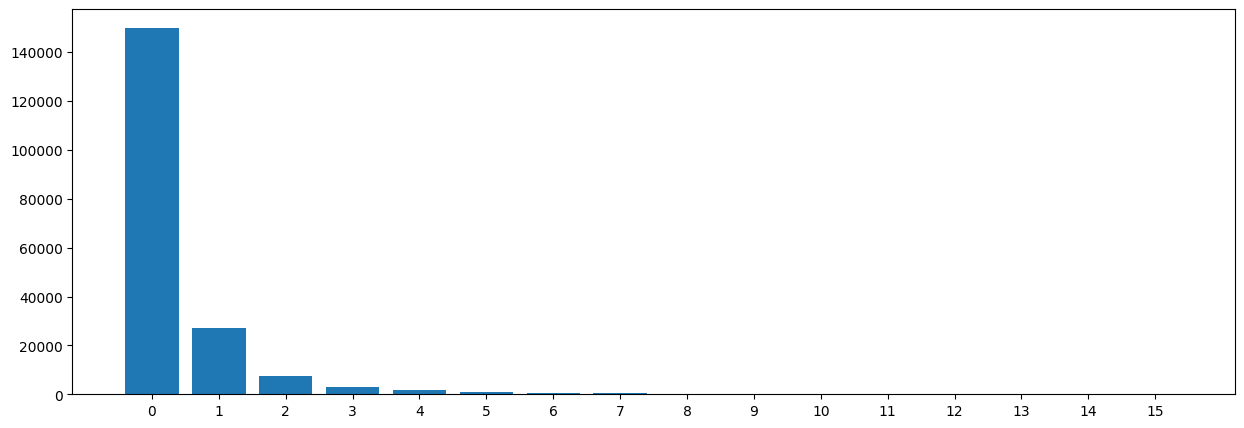

In [8]:
plt.figure(figsize=(15, 5))
plt.bar(x=ship_count["EncodedPixels"],
        height=ship_count["ImageId"],
        tick_label=ship_count["EncodedPixels"]
       )

#### Non-zero distribution: 

<BarContainer object of 15 artists>

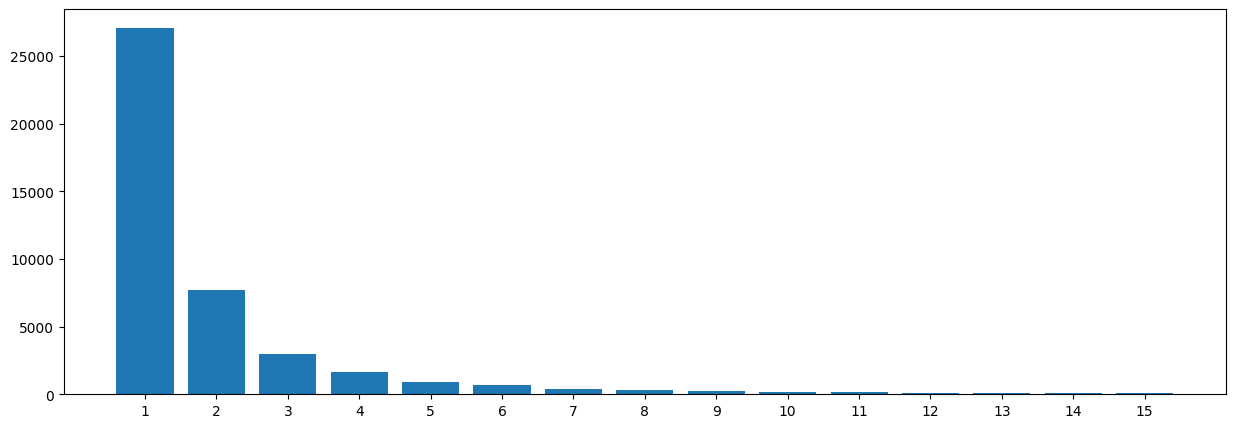

In [9]:
plt.figure(figsize=(15, 5))
plt.bar(x=ship_count["EncodedPixels"].iloc[1:],
        height=ship_count["ImageId"].iloc[1:],
        tick_label=ship_count["EncodedPixels"].iloc[1:]
       )

## Ship Areas

### Total Ships Areas per Image

In [10]:
areas = pd.DataFrame.from_dict(rle_dict, orient="index",  columns=["Area", "ShipCount"])
areas_grouped = (areas.groupby("ShipCount").sum()/areas.groupby("ShipCount").count()).astype(int)
areas_grouped.T

ShipCount,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Area,0,2420,3454,4103,4432,4720,4892,5617,6154,5018,6075,5057,5407,4947,6751,4751


<BarContainer object of 16 artists>

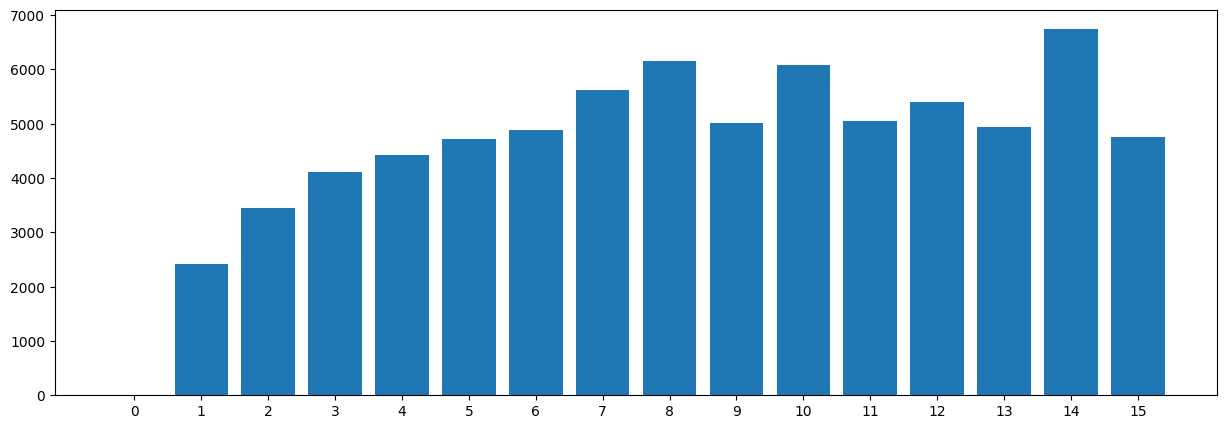

In [11]:
plt.figure(figsize=(15, 5))
plt.bar(x=areas_grouped.index, height=areas_grouped["Area"], tick_label=areas_grouped.index)

### Average area of ONE ship in ONE image

In [48]:
area_per_single_ship = ((
    areas.groupby("ShipCount").sum()/areas.groupby("ShipCount").count()
).iloc[1:].T/(areas.groupby("ShipCount", as_index=False).count()['ShipCount'].iloc[1:])).T
area_per_single_ship.T

ShipCount,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Area,2420.818994,1727.433607,1367.753893,1108.156751,944.053838,815.485794,802.549965,769.319575,557.5615,607.584524,459.730429,450.611559,380.602051,482.256579,316.79596


<BarContainer object of 15 artists>

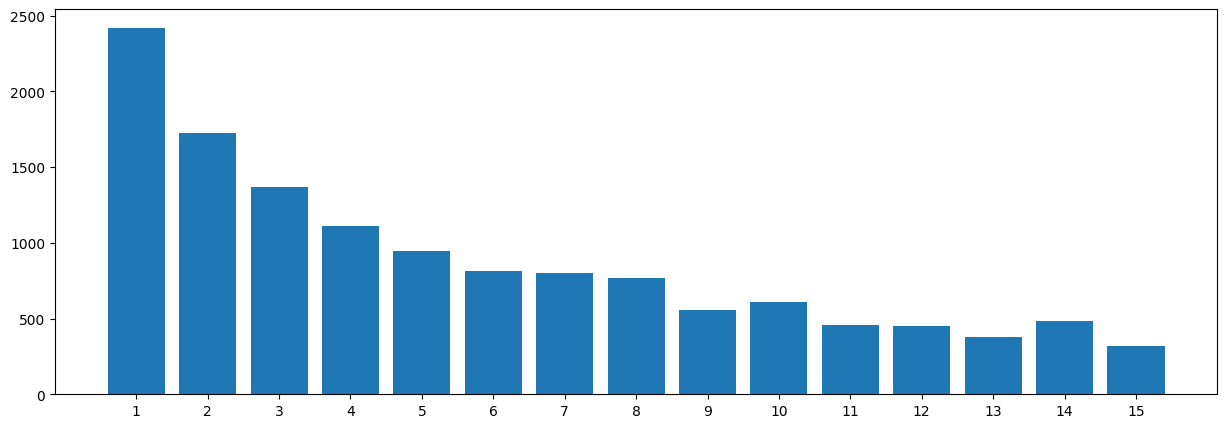

In [49]:
plt.figure(figsize=(15, 5))
plt.bar(x=area_per_single_ship.index, height=area_per_single_ship["Area"], tick_label=area_per_single_ship.index)